In [1]:
import pandas as pd
import numpy as np

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
df_train = pd.read_csv('apr-train-sub-cat-4.csv',low_memory=False)

In [4]:
df_train.head()

,x_ray_image_file_name,sub_category
0,1.jpg,computer components and accessories
1,2.jpg,iphone
2,4.jpg,laptops
3,5.jpg,books
4,6.jpg,books


In [5]:
df_test = pd.read_csv('apr-test-sub-cat-3.csv',low_memory=False)

In [6]:
df_test.head()

,x_ray_image_file_name,predictions
0,200001.jpg,home decor and furnishing
1,200002.jpg,jewellery
2,200003.jpg,"case, cover and screenguards"
3,200004.jpg,mobiles
4,200005.jpg,tablets


In [7]:
sz = 250
arch = dn201
bs = 64
path='data/delhivery'

In [8]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,aug_tfms=[RandomFlip(),RandomRotate(10)],crop_type=CropType.NO)

In [9]:
data = ImageClassifierData.from_csv(path='data/delhivery/',folder='train',csv_fname='apr-train-sub-cat-4.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=4)

In [11]:
len(data.classes)

77

In [12]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.val_dl))

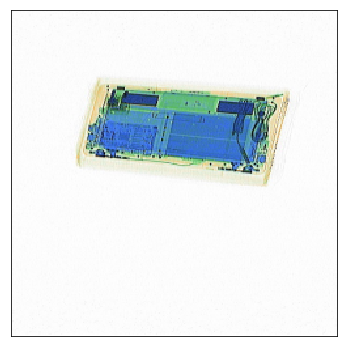

In [13]:
show_img(data.val_ds.denorm(to_np(x))[0],figsize=(6,6))

In [14]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

100%|██████████| 324/324 [02:33<00:00,  2.11it/s]


In [15]:
len(data.classes)

77

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 84%|████████▍ | 1084/1294 [00:17<00:03, 61.87it/s, loss=6.77]

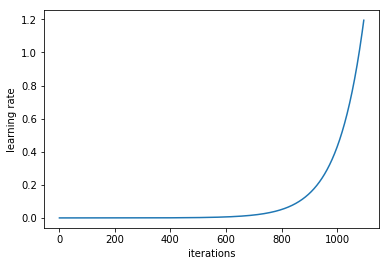

In [16]:
lrf=learn.lr_find()
learn.sched.plot_lr()

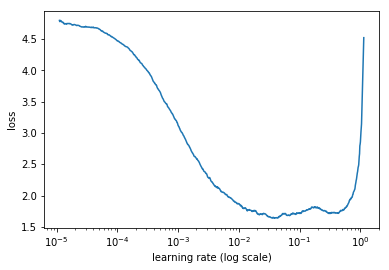

In [17]:
learn.sched.plot()

In [18]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

  9%|▊         | 112/1294 [00:02<00:21, 55.32it/s, loss=3.09]

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.553017   1.389352   0.650993  
    1      1.349503   1.234903   0.676321                     
    2      1.218733   1.160254   0.693837                     
    3      1.16265    1.112354   0.703144                     
    4      1.114108   1.081591   0.71087                      



[1.0815908, 0.71086998449431527]

In [ ]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.031741   1.061296   0.714535  
    1      1.031326   1.041524   0.719068                     
    2      1.01688    1.034474   0.72148                       
    3      1.037054   1.014804   0.723495                      
    4      0.953371   1.00377    0.727836                      



[1.0037704, 0.72783564822173408]

In [20]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.89376    0.998746   0.729851  
    1      0.931463   0.994042   0.730768                      
    2      0.982083   0.989338   0.730623                      
  3%|▎         | 37/1294 [00:01<00:37, 33.91it/s, loss=0.969]

In [21]:
learn.fit(0.0001,5)

    2      0.912306   0.984511   0.7326    
    3      0.902646   0.984893   0.73424                       
    4      0.924222   0.987134   0.732272                      



[0.98713404, 0.73227237661679589]

In [22]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(24,24))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [23]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)


0.73245698820800309

Confusion matrix, without normalization
[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   2   0]
 [  0   0   0 ...,   0 306   0]
 [  0   0   0 ...,   0   3   0]]


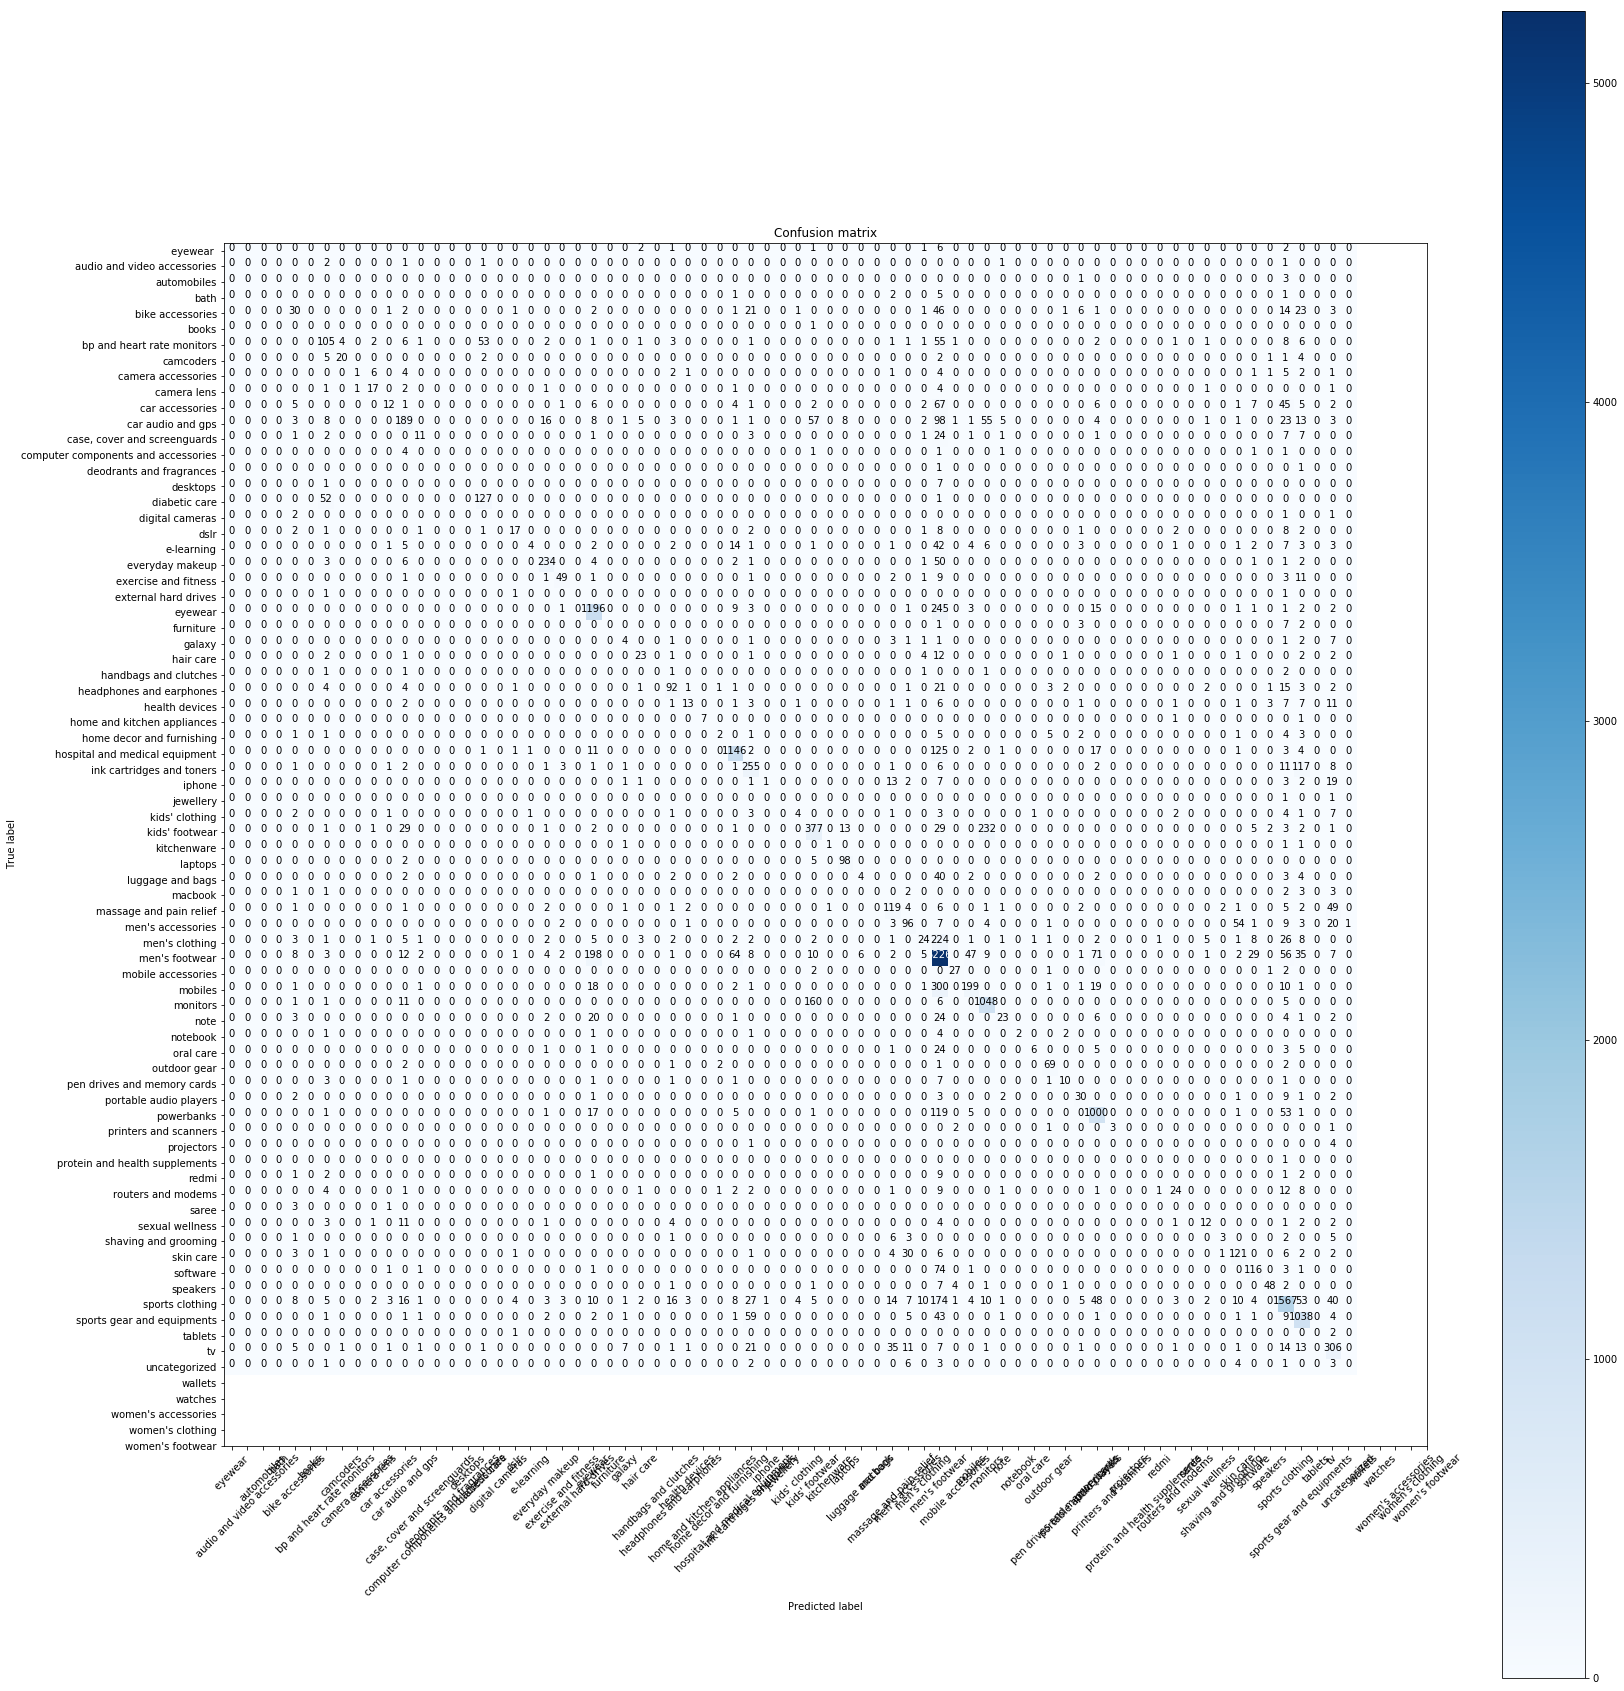

In [24]:
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

In [25]:
preds = predictions

In [26]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [27]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [28]:
PATH= '/home/paperspace/fastai/courses/dl1/data/delhivery/'

Correctly classified


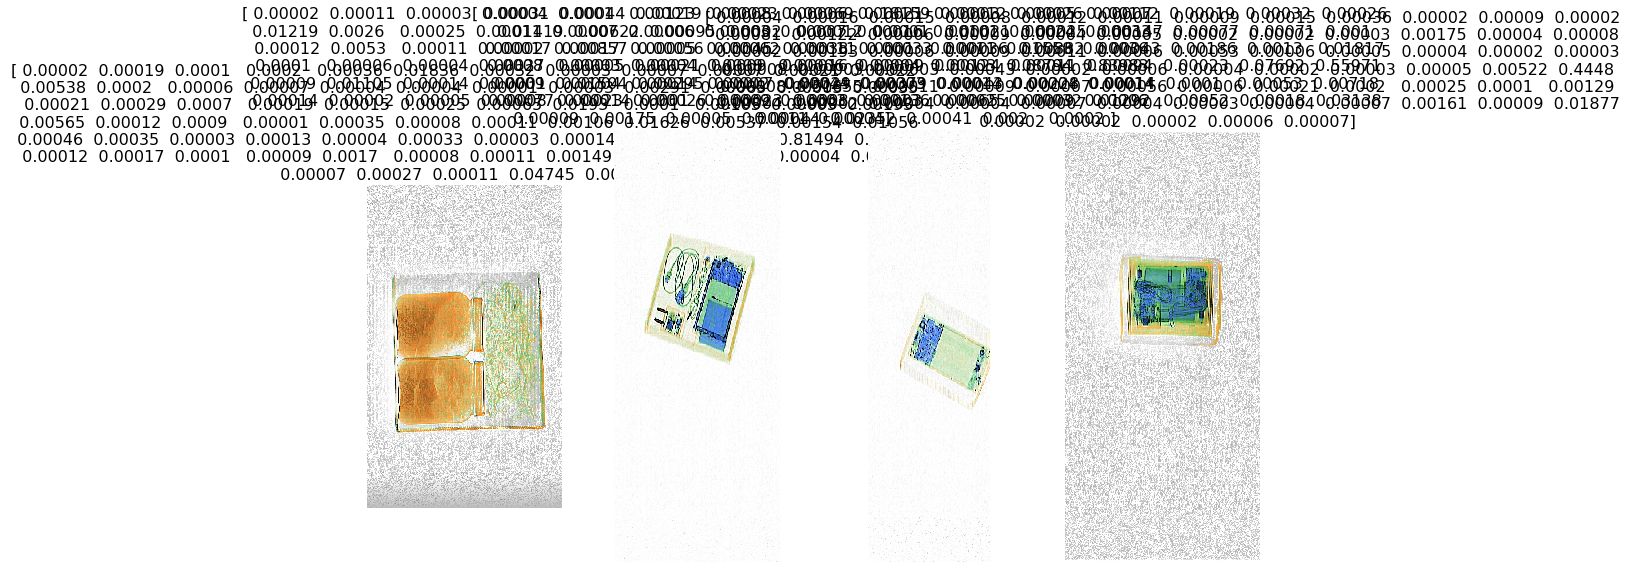

In [29]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


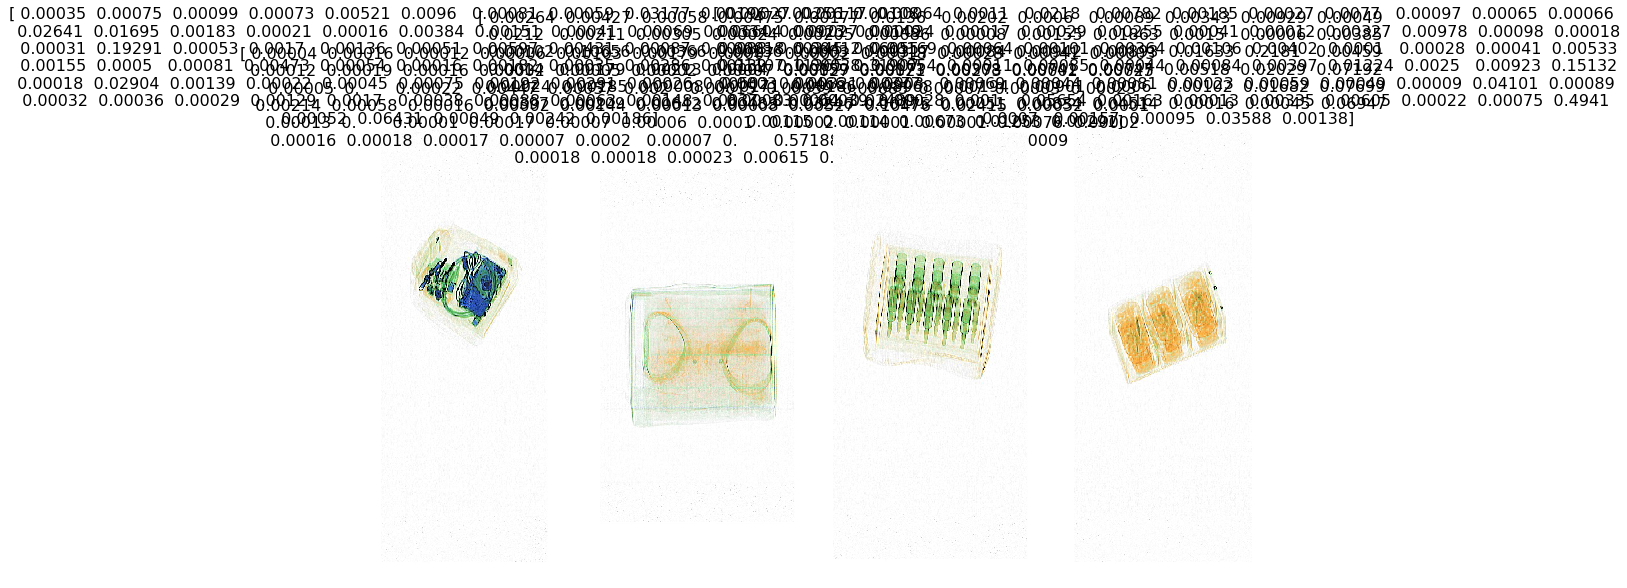

In [30]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [31]:
learn.unfreeze()

In [32]:
# val_df = pd.read_csv('false_final_train.csv',low_memory=False)

In [33]:
# val_df.head()

In [34]:
# for i,row in val_df.iterrows():
#     pic_name = row['x_ray_image_file_name']
#     full_path = '/home/paperspace/fastai/courses/dl1/'+path+'/train/'+pic_name
#     image = val_tfms(open_image(full_path))
#     pred = learn.predict_array(image[None])
#     max_val = np.max(np.exp(pred[0,:]))
#     actual_pred = data.classes[np.argmax(pred[0,:])]

#     val_df.loc[i,'max_val']=max_val
#     val_df.loc[i,'cat_pred']=actual_pred


#     try:    
#         our_pred = row['sub_category']
        
#         print(str(i)+" "+our_pred+" "+actual_pred+" "+str(max_val))
#         if our_pred != actual_pred:
#             val_df.loc[i,'product_description']=False
#         else:
#             val_df.loc[i,'product_description']=True

        
#     except:
#         val_df.loc[i,'product_description']=True
#         print("Error")

In [35]:
# val_df.to_csv('our_val_3.csv',index=False)

In [36]:
# len(val_df)

In [37]:
# len(val_df[val_df['product_description']==False])

In [38]:
test_name = '/home/paperspace/fastai/courses/dl1/'+path+'/train/698.jpg'
im = val_tfms(open_image(test_name))
pred = learn.predict_array(im[None])

In [39]:
np.exp(pred)


array([[ 0.00011,  0.00012,  0.00027,  0.00005,  0.00006,  0.00021,  0.00019,  0.00006,  0.00178,  0.0002 ,
         0.00009,  0.00009,  0.00069,  0.00165,  0.0002 ,  0.00004,  0.00006,  0.00097,  0.00017,  0.00005,
         0.00012,  0.00426,  0.00418,  0.00015,  0.00009,  0.02536,  0.00008,  0.00007,  0.00025,  0.00003,
         0.00169,  0.00026,  0.0001 ,  0.00005,  0.00028,  0.00208,  0.00045,  0.00011,  0.00024,  0.00007,
         0.00008,  0.00002,  0.00021,  0.00011,  0.00014,  0.00004,  0.00214,  0.86604,  0.00009,  0.06675,
         0.00004,  0.00005,  0.00012,  0.00249,  0.00014,  0.00051,  0.00004,  0.00076,  0.0004 ,  0.00022,
         0.00038,  0.0001 ,  0.00002,  0.00008,  0.00084,  0.00013,  0.00007,  0.00047,  0.00008,  0.00347,
         0.00073,  0.00408,  0.00004,  0.00047,  0.0001 ,  0.00149,  0.00006]], dtype=float32)

In [40]:
data.classes[np.argmax(pred[0,:])]


'mobiles'

In [41]:
np.exp(pred[0,9])

0.00020363531

In [42]:
data.classes

[' eyewear ',
 'audio and video accessories',
 'automobiles',
 'bath',
 'bike accessories',
 'books',
 'bp and heart rate monitors',
 'camcoders',
 'camera accessories',
 'camera lens',
 'car accessories',
 'car audio and gps',
 'case, cover and screenguards',
 'computer components and accessories',
 'deodrants and fragrances',
 'desktops',
 'diabetic care',
 'digital cameras',
 'dslr',
 'e-learning',
 'everyday makeup',
 'exercise and fitness',
 'external hard drives',
 'eyewear',
 'furniture',
 'galaxy',
 'hair care',
 'handbags and clutches',
 'headphones and earphones',
 'health devices',
 'home and kitchen appliances',
 'home decor and furnishing',
 'hospital and medical equipment',
 'ink cartridges and toners',
 'iphone',
 'jewellery',
 "kids' clothing",
 "kids' footwear",
 'kitchenware',
 'laptops',
 'luggage and bags',
 'macbook',
 'massage and pain relief',
 "men's accessories",
 "men's clothing",
 "men's footwear",
 'mobile accessories',
 'mobiles',
 'monitors',
 'note',
 'no

In [43]:
# data.classes.index('mobiles')
# data.classes.index('watches')
# data.classes.index('laptops')
# data.classes.index("women's clothing")


42  66 35 68

In [45]:
df_test_org = pd.read_csv('apr-test-sub-cat-3.csv',low_memory=False)


In [46]:
df_test_org[:20]


,x_ray_image_file_name,predictions
0,200001.jpg,home decor and furnishing
1,200002.jpg,jewellery
2,200003.jpg,"case, cover and screenguards"
3,200004.jpg,mobiles
4,200005.jpg,tablets
5,200006.jpg,tablets
6,200008.jpg,mobiles
7,200010.jpg,women's clothing
8,200011.jpg,watches
9,200012.jpg,jewellery


In [47]:
x,y = np.unique(df_test_org['predictions'],return_counts=True)
dict(zip(x,y))

{'audio and video accessories': 12,
 'automobiles': 3,
 'bath': 3,
 'bike accessories': 13,
 'books': 109,
 'bp and heart rate monitors': 1,
 'camera accessories': 204,
 'camera lens': 24,
 'car accessories': 18,
 'car audio and gps': 78,
 'case, cover and screenguards': 123,
 'computer components and accessories': 350,
 'deodrants and fragrances': 21,
 'desktops': 3,
 'diabetic care': 4,
 'digital cameras': 26,
 'dslr': 191,
 'e-learning': 2,
 'everyday makeup': 14,
 'exercise and fitness': 81,
 'external hard drives': 240,
 'eyewear': 50,
 'galaxy': 4999,
 'hair care': 4,
 'handbags and clutches': 26,
 'headphones and earphones': 23,
 'health devices': 2,
 'home and kitchen appliances': 171,
 'home decor and furnishing': 28,
 'hospital and medical equipment': 7,
 'ink cartridges and toners': 1,
 'iphone': 2208,
 'jewellery': 268,
 "kids' clothing": 60,
 'kitchenware': 14,
 'laptops': 1065,
 'luggage and bags': 12,
 'macbook': 149,
 'massage and pain relief': 43,
 "men's accessories":

In [48]:
for i,row in df_test_org.iterrows():
    pic_name = row['x_ray_image_file_name']
    full_path = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
    image = val_tfms(open_image(full_path))
    pred = learn.predict_array(image[None])
    try:    
        our_pred = row['predictions']
        actual_pred = data.classes[np.argmax(pred[0,:])]
        if our_pred != actual_pred:
            if our_pred == 'mobiles' or our_pred == 'laptops' or our_pred == 'watches' or our_pred == "women's clothing" or our_pred == 'iphone' or our_pred == 'redmi' or our_pred == 'galaxy' or our_pred == 'note' or our_pred == 'notebook' or our_pred=='dslr' or our_pred=='macbook' or our_pred=='saree':
                print(str(i)+" "+our_pred+" "+actual_pred)
                df_test_org.loc[i,'product_description']=False
            else:
                df_test_org.loc[i,'product_description']=True
            if True:
                index_of=data.classes.index(our_pred)
                if np.exp(pred[0,index_of])>0.1:
                    df_test_org.loc[i,'product_description']=True
                      
        else:
            df_test_org.loc[i,'product_description']=True
        
    except:
        df_test_org.loc[i,'product_description']=True
        print("Error")

7 women's clothing watches
18 laptops mobiles
19 mobiles redmi
28 note mobiles
51 galaxy mobiles
52 watches jewellery
57 watches uncategorized
61 watches jewellery
75 galaxy mobiles
76 galaxy mobiles
83 note mobiles
92 dslr camera accessories
106 dslr watches
112 watches jewellery
114 watches jewellery
119 galaxy mobiles
125 mobiles galaxy
128 mobiles galaxy
129 galaxy iphone
130 iphone mobiles
147 mobiles watches
151 mobiles computer components and accessories
154 mobiles mobile accessories
155 mobiles mobile accessories
156 mobiles mobile accessories
182 note mobiles
183 galaxy mobiles
184 note mobiles
185 note mobiles
186 note mobiles
211 dslr camera accessories
232 mobiles galaxy
235 laptops galaxy
241 galaxy mobiles
244 mobiles laptops
251 galaxy mobiles
256 galaxy mobiles
258 note mobiles
259 galaxy mobiles
260 note mobiles
263 redmi mobiles
264 galaxy mobiles
266 iphone galaxy
269 redmi galaxy
273 note mobiles
275 iphone mobiles
276 redmi mobiles
277 iphone mobiles
282 mobiles u

1952 galaxy mobiles
1965 note mobiles
1966 mobiles redmi
1968 mobiles uncategorized
1977 note mobiles
1978 mobiles redmi
1980 galaxy mobiles
1981 dslr mobiles
1982 mobiles dslr
1983 dslr camera accessories
1984 dslr camera accessories
1992 iphone mobiles
1994 galaxy monitors
1998 galaxy mobiles
2011 laptops notebook
2016 galaxy mobiles
2023 mobiles redmi
2027 mobiles dslr
2030 mobiles iphone
2041 note mobiles
2045 galaxy mobiles
2046 galaxy mobiles
2047 galaxy mobiles
2050 iphone mobiles
2054 iphone mobiles
2055 mobiles iphone
2056 iphone mobiles
2061 galaxy mobiles
2066 galaxy mobiles
2097 mobiles mobile accessories
2099 mobiles books
2104 laptops notebook
2105 watches mobiles
2145 mobiles galaxy
2150 mobiles galaxy
2162 mobiles galaxy
2172 watches tablets
2184 saree mobiles
2185 mobiles uncategorized
2186 note mobiles
2191 mobiles galaxy
2193 galaxy mobiles
2195 note mobiles
2197 mobiles uncategorized
2199 mobiles printers and scanners
2204 note mobiles
2214 mobiles camera accessorie

4759 mobiles tablets
4761 galaxy mobiles
4909 galaxy mobiles
4911 galaxy mobiles
4976 iphone mobiles
5008 laptops notebook
5018 notebook mobiles
5035 mobiles galaxy
5038 galaxy mobiles
5040 watches mobiles
5041 watches mobiles
5117 iphone mobiles
5159 note mobiles
5257 laptops mobiles
5258 mobiles galaxy
5518 mobiles galaxy
5528 galaxy mobiles
5529 note mobiles
5530 iphone mobiles
5532 laptops notebook
5539 women's clothing men's clothing
5570 women's clothing women's footwear
5573 iphone watches
5576 notebook galaxy
5577 iphone mobiles
5584 laptops notebook
5586 laptops mobiles
5590 saree notebook
5598 laptops notebook
5599 laptops notebook
5600 dslr camera accessories
5603 notebook laptops
5617 mobiles macbook
5619 mobiles redmi
5622 galaxy mobiles
5624 laptops protein and health supplements
5628 dslr camera accessories
5638 mobiles tablets
5642 laptops notebook
5644 iphone mobiles
5648 iphone mobiles
5649 iphone mobiles
5650 iphone mobiles
5651 galaxy mobiles
5653 iphone mobiles
565

8162 galaxy mobiles
8163 mobiles galaxy
8166 mobiles galaxy
8168 iphone mobiles
8171 mobiles galaxy
8172 mobiles galaxy
8175 mobiles redmi
8178 galaxy mobiles
8186 mobiles galaxy
8187 mobiles galaxy
8189 mobiles galaxy
8190 iphone mobiles
8195 iphone mobiles
8196 mobiles redmi
8197 galaxy mobiles
8199 galaxy iphone
8208 note galaxy
8212 galaxy mobiles
8214 galaxy mobiles
8216 galaxy watches
8223 mobiles galaxy
8224 mobiles galaxy
8226 mobiles galaxy
8235 galaxy mobiles
8239 mobiles galaxy
8240 mobiles galaxy
8243 mobiles galaxy
8253 note mobiles
8254 mobiles galaxy
8258 iphone mobiles
8259 mobiles galaxy
8260 galaxy mobiles
8261 mobiles galaxy
8265 mobiles galaxy
8267 mobiles note
8276 mobiles galaxy
8277 redmi mobiles
8286 mobiles galaxy
8297 note mobiles
8298 iphone mobiles
8301 iphone mobiles
8304 mobiles galaxy
8310 note mobiles
8311 mobiles galaxy
8312 galaxy iphone
8313 mobiles galaxy
8314 mobiles galaxy
8318 mobiles note
8320 mobiles iphone
8322 mobiles galaxy
8324 mobiles galax

9671 mobiles galaxy
9687 mobiles redmi
9699 galaxy mobiles
9700 galaxy notebook
9701 mobiles galaxy
9709 notebook mobiles
9711 iphone mobiles
9714 mobiles galaxy
9717 mobiles redmi
9720 mobiles redmi
9722 mobiles iphone
9725 mobiles galaxy
9730 mobiles galaxy
9740 iphone mobiles
9743 mobiles note
9756 iphone redmi
9766 mobiles galaxy
9768 mobiles galaxy
9771 mobiles galaxy
9773 mobiles galaxy
9783 watches mobiles
9791 galaxy mobiles
9795 redmi mobiles
9799 mobiles galaxy
9801 mobiles galaxy
9804 mobiles redmi
9812 mobiles redmi
9816 mobiles galaxy
9820 mobiles galaxy
9822 mobiles redmi
9826 mobiles redmi
9834 mobiles galaxy
9835 galaxy mobiles
9841 mobiles redmi
9843 notebook galaxy
9847 mobiles redmi
9851 mobiles galaxy
9857 galaxy mobiles
9858 mobiles iphone
9865 galaxy redmi
9866 galaxy mobiles
9874 iphone galaxy
9881 mobiles galaxy
9887 saree galaxy
9891 mobiles galaxy
9895 galaxy mobiles
9900 galaxy mobiles
9901 galaxy camera accessories
9909 laptops galaxy
9918 iphone galaxy
9920

10811 iphone mobiles
10814 iphone mobiles
10820 iphone mobiles
10825 iphone mobiles
10828 mobiles iphone
10833 mobiles uncategorized
10834 mobiles powerbanks
10835 mobiles uncategorized
10836 mobiles uncategorized
10840 galaxy mobiles
10844 note mobiles
10850 watches mobiles
10852 iphone mobiles
10853 notebook mobiles
10854 galaxy mobiles
10857 galaxy mobiles
10863 galaxy mobiles
10872 watches mobiles
10878 galaxy mobiles
10884 galaxy mobiles
10887 galaxy mobiles
10888 mobiles redmi
10895 note mobiles
10903 galaxy mobiles
10904 galaxy mobiles
10908 galaxy mobiles
10909 mobiles uncategorized
10914 mobiles pen drives and memory cards
10927 laptops mobiles
10929 galaxy mobiles
10933 mobiles galaxy
10940 galaxy mobiles
10956 galaxy mobiles
10959 mobiles iphone
10972 mobiles iphone
10973 notebook mobiles
10975 mobiles iphone
10981 notebook galaxy
10982 mobiles iphone
10992 watches galaxy
10998 galaxy mobiles
11011 galaxy mobiles
11017 galaxy mobiles
11024 galaxy mobiles
11032 galaxy mobiles

12555 galaxy mobiles
12556 iphone mobiles
12561 laptops notebook
12563 mobiles redmi
12564 iphone tablets
12566 notebook laptops
12573 laptops macbook
12574 galaxy iphone
12583 notebook laptops
12590 laptops notebook
12592 notebook laptops
12593 mobiles galaxy
12594 laptops notebook
12595 laptops notebook
12598 laptops notebook
12612 iphone mobiles
12615 iphone mobiles
12620 galaxy iphone
12621 mobiles iphone
12623 note mobiles
12629 galaxy iphone
12643 iphone mobiles
12645 mobiles iphone
12647 notebook iphone
12656 notebook iphone
12659 galaxy iphone
12661 mobiles iphone
12662 iphone note
12663 mobiles iphone
12666 mobiles iphone
12670 mobiles iphone
12671 galaxy iphone
12676 mobiles iphone
12680 mobiles iphone
12686 mobiles iphone
12687 iphone mobiles
12690 iphone mobiles
12701 laptops iphone
12706 mobiles iphone
12710 iphone mobiles
12720 laptops notebook
12726 laptops notebook
12732 iphone mobiles
12733 mobiles note
12736 laptops notebook
12743 redmi iphone
12744 mobiles laptops
12

14173 mobiles macbook
14175 mobiles macbook
14178 dslr camera accessories
14179 mobiles notebook
14180 galaxy iphone
14181 mobiles iphone
14183 iphone redmi
14185 notebook laptops
14187 laptops notebook
14193 notebook mobiles
14194 notebook laptops
14199 watches redmi
14205 galaxy mobiles
14220 mobiles macbook
14222 mobiles iphone
14223 iphone mobiles
14224 mobiles iphone
14228 mobiles iphone
14231 mobiles iphone
14241 mobiles galaxy
14242 notebook laptops
14243 notebook iphone
14250 dslr camera accessories
14251 mobiles iphone
14254 notebook laptops
14255 laptops computer components and accessories
14256 saree iphone
14258 galaxy mobiles
14268 galaxy iphone
14269 iphone mobiles
14286 laptops notebook
14289 mobiles galaxy
14290 galaxy mobiles
14295 iphone redmi
14297 mobiles iphone
14302 galaxy iphone
14305 watches iphone
14316 laptops notebook
14320 laptops notebook
14328 galaxy iphone
14330 laptops notebook
14334 laptops notebook
14335 dslr camera accessories
14336 dslr camera access

16527 galaxy camera accessories
16534 watches mobiles
16537 women's clothing mobiles
16540 watches mobiles
16544 galaxy redmi
16563 galaxy mobiles
16565 mobiles notebook
16568 mobiles uncategorized
16570 galaxy mobiles
16573 laptops mobiles
16582 iphone mobiles
16605 watches jewellery
16606 watches jewellery
16608 watches jewellery
16609 watches jewellery
16610 watches jewellery
16615 watches jewellery
16617 watches deodrants and fragrances
16620 watches mobiles
16622 watches jewellery
16631 watches jewellery
16644 watches jewellery
16648 watches jewellery
16651 galaxy iphone
16652 laptops notebook
16659 watches jewellery
16660 watches jewellery
16663 watches jewellery
16664 watches jewellery
16676 watches jewellery
16680 watches jewellery
16688 dslr watches
16691 watches jewellery
16714 watches jewellery
16725 galaxy mobiles
16736 watches mobiles
16739 mobiles laptops
16740 mobiles laptops
16749 galaxy mobiles
16750 galaxy mobiles
16764 galaxy mobiles
16769 laptops mobiles
16770 saree

18052 note mobiles
18054 galaxy mobiles
18056 galaxy mobiles
18058 mobiles galaxy
18062 mobiles iphone
18064 note mobiles
18070 note mobiles
18073 iphone mobiles
18075 galaxy mobiles
18076 galaxy mobiles
18077 galaxy mobiles
18078 galaxy mobiles
18084 dslr mobiles
18086 galaxy iphone
18101 galaxy mobiles
18104 notebook laptops
18105 galaxy mobiles
18120 dslr mobiles
18126 mobiles galaxy
18129 mobiles galaxy
18133 mobiles galaxy
18135 saree mobiles
18137 galaxy uncategorized
18139 galaxy mobiles
18151 mobiles galaxy
18162 galaxy mobiles
18170 galaxy external hard drives
18172 galaxy mobiles
18182 laptops mobiles
18184 mobiles galaxy
18207 mobiles galaxy
18208 mobiles iphone
18212 mobiles galaxy
18216 galaxy mobiles
18218 galaxy pen drives and memory cards
18227 galaxy redmi
18233 mobiles galaxy
18234 galaxy watches
18236 galaxy mobiles
18237 galaxy mobiles
18240 galaxy mobiles
18241 mobiles iphone
18260 mobiles galaxy
18261 galaxy mobiles
18263 iphone galaxy
18266 galaxy mobiles
18275 g

19996 note mobiles
19999 mobiles galaxy
20002 galaxy mobiles
20005 iphone mobiles
20006 galaxy mobiles
20010 note mobiles
20014 mobiles galaxy
20019 galaxy mobiles
20026 galaxy mobiles
20029 mobiles note
20036 iphone galaxy
20037 mobiles galaxy
20050 galaxy mobiles
20060 galaxy mobiles
20063 galaxy mobiles
20065 galaxy mobiles
20077 iphone galaxy
20078 laptops mobiles
20079 laptops mobiles
20086 galaxy mobiles
20088 mobiles galaxy
20093 mobiles galaxy
20097 mobiles galaxy
20101 mobiles galaxy
20120 mobiles iphone
20123 galaxy redmi
20125 galaxy mobiles
20135 mobiles galaxy
20137 note mobiles
20142 galaxy mobiles
20143 iphone galaxy
20148 note mobiles
20149 galaxy note
20151 note mobiles
20154 galaxy mobiles
20155 iphone galaxy
20164 galaxy note
20169 galaxy mobiles
20170 mobiles galaxy
20175 iphone mobiles
20181 galaxy mobiles
20182 mobiles galaxy
20184 mobiles galaxy
20190 mobiles galaxy
20192 mobiles external hard drives
20201 mobiles galaxy
20204 mobiles galaxy
20222 galaxy mobiles


21854 mobiles redmi
21855 mobiles redmi
21860 iphone mobiles
21861 mobiles redmi
21862 mobiles redmi
21863 galaxy mobiles
21868 galaxy mobiles
21874 note mobiles
21881 mobiles iphone
21885 note mobiles
21894 note mobiles
21896 galaxy notebook
21898 note mobiles
21925 mobiles iphone
21926 redmi tablets
21932 mobiles redmi
21933 galaxy mobiles
21939 note mobiles
21943 galaxy mobiles
21944 note mobiles
21946 galaxy mobiles
21947 note mobiles
21948 galaxy mobiles
21949 note mobiles
21953 mobiles galaxy
21958 note mobiles
21963 note mobiles
21966 saree watches
21970 mobiles notebook
21972 note mobiles
21984 mobiles tablets
21986 mobiles iphone
21988 mobiles galaxy
21994 note mobiles
21999 mobiles watches
22000 mobiles galaxy
22005 mobiles watches
22007 dslr galaxy
22015 dslr galaxy
22019 mobiles note
22020 galaxy mobiles
22027 notebook galaxy
22028 mobiles note
22045 galaxy mobiles
22051 mobiles note
22052 galaxy mobiles
22062 laptops galaxy
22064 iphone mobiles
22077 mobiles galaxy
22081 g

23897 saree galaxy
23900 laptops galaxy
23904 mobiles galaxy
23906 galaxy mobiles
23908 mobiles galaxy
23914 mobiles galaxy
23921 mobiles note
23923 galaxy mobiles
23925 mobiles galaxy
23934 laptops galaxy
23937 watches mobiles
23946 mobiles galaxy
23948 galaxy notebook
23959 mobiles galaxy
23960 mobiles galaxy
23966 galaxy iphone
23974 laptops mobiles
23975 galaxy mobiles
23977 iphone mobiles
23981 mobiles galaxy
23993 galaxy mobiles
23994 mobiles galaxy
23997 mobiles galaxy
23999 galaxy mobiles
24001 mobiles galaxy
24003 mobiles galaxy
24004 watches galaxy
24008 mobiles galaxy
24010 mobiles galaxy
24013 galaxy mobiles
24019 galaxy mobiles
24020 galaxy mobiles
24023 mobiles galaxy
24024 mobiles galaxy
24030 mobiles galaxy
24032 mobiles galaxy
24044 mobiles uncategorized
24055 mobiles galaxy
24056 mobiles galaxy
24058 mobiles galaxy
24061 mobiles galaxy
24062 galaxy mobiles
24066 galaxy mobiles
24081 galaxy mobiles
24083 mobiles galaxy
24090 mobiles galaxy
24096 mobiles watches
24100 m

25890 laptops computer components and accessories
25903 galaxy mobiles
25907 iphone galaxy
25911 mobiles galaxy
25912 macbook notebook
25920 mobiles watches
25935 mobiles watches
25939 galaxy mobiles
25942 laptops computer components and accessories
25944 iphone galaxy
25947 iphone tablets
25949 galaxy camera accessories
25956 redmi galaxy
25959 note laptops
25971 mobiles iphone
25972 mobiles note
25978 iphone redmi
25979 saree notebook
25984 notebook mobiles
25990 laptops watches
25994 galaxy mobiles
26012 galaxy mobiles
26013 mobiles galaxy
26016 galaxy mobiles
26017 galaxy iphone
26027 redmi mobiles
26041 galaxy mobiles
26043 redmi galaxy
26052 mobiles note
26074 mobiles galaxy
26076 mobiles iphone
26078 mobiles galaxy
26081 mobiles iphone
26082 mobiles iphone
26083 mobiles galaxy
26095 iphone uncategorized
26118 women's clothing uncategorized
26119 mobiles iphone
26123 mobiles redmi
26124 galaxy mobiles
26126 laptops galaxy
26203 mobiles mobile accessories
26213 women's clothing me

In [49]:
df_test_org.to_csv('06-Apr-14.csv',index=False)

In [50]:
df_test_org.head()


,x_ray_image_file_name,predictions,product_description
0,200001.jpg,home decor and furnishing,True
1,200002.jpg,jewellery,True
2,200003.jpg,"case, cover and screenguards",True
3,200004.jpg,mobiles,True
4,200005.jpg,tablets,True


In [51]:

df_false=df_test_org[df_test_org['product_description']==False]




In [52]:
x,y= np.unique(df_false['predictions'],return_counts=True)
dict(zip(x,y))

{'dslr': 38,
 'galaxy': 619,
 'iphone': 388,
 'laptops': 267,
 'macbook': 28,
 'mobiles': 634,
 'note': 315,
 'notebook': 90,
 'redmi': 45,
 'saree': 57,
 'watches': 95,
 "women's clothing": 19}

In [53]:
len(df_train)

103464

In [54]:
len(df_false)

2595

In [55]:
len(df_test)

27425

In [56]:
data.classes

[' eyewear ',
 'audio and video accessories',
 'automobiles',
 'bath',
 'bike accessories',
 'books',
 'bp and heart rate monitors',
 'camcoders',
 'camera accessories',
 'camera lens',
 'car accessories',
 'car audio and gps',
 'case, cover and screenguards',
 'computer components and accessories',
 'deodrants and fragrances',
 'desktops',
 'diabetic care',
 'digital cameras',
 'dslr',
 'e-learning',
 'everyday makeup',
 'exercise and fitness',
 'external hard drives',
 'eyewear',
 'furniture',
 'galaxy',
 'hair care',
 'handbags and clutches',
 'headphones and earphones',
 'health devices',
 'home and kitchen appliances',
 'home decor and furnishing',
 'hospital and medical equipment',
 'ink cartridges and toners',
 'iphone',
 'jewellery',
 "kids' clothing",
 "kids' footwear",
 'kitchenware',
 'laptops',
 'luggage and bags',
 'macbook',
 'massage and pain relief',
 "men's accessories",
 "men's clothing",
 "men's footwear",
 'mobile accessories',
 'mobiles',
 'monitors',
 'note',
 'no

In [57]:
temp_df = pd.read_csv('06-Apr-3.csv')

In [58]:
temp_df.head()

,x_ray_image_file_name,predictions,product_description
0,200001.jpg,home decor and furnishing,True
1,200002.jpg,jewellery,True
2,200003.jpg,books,True
3,200004.jpg,mobiles,True
4,200005.jpg,tablets,True


In [59]:
len(temp_df[temp_df['product_description']])

22131

In [60]:
len(temp_df)-23826

3599